SAHIL SHAKEEL
21BDS0333

In [ ]:
#we are splitting the dataset into two mini datasets to apply joins()
import pandas as pd

# Load the dataset
df = pd.read_csv("shootings.csv")

# Split the dataset
df1 = df.iloc[:, :8]  # First 8 columns
df2 = df.iloc[:, 8:]  # Last 7 columns

# Ensure 'id' column is in df2
if 'id' in df.columns:
    df2 = pd.concat([df[['id']], df2], axis=1)






In [17]:
print(df1)

        id                name      date   manner_of_death       armed   age  \
0        3          Tim Elliot  02/01/15              shot         gun  53.0   
1        4    Lewis Lee Lembke  02/01/15              shot         gun  47.0   
2        5  John Paul Quintero  03/01/15  shot and Tasered     unarmed  23.0   
3        8     Matthew Hoffman  04/01/15              shot  toy weapon  32.0   
4        9   Michael Rodriguez  04/01/15              shot    nail gun  39.0   
...    ...                 ...       ...               ...         ...   ...   
4890  5916     Rayshard Brooks  12/06/20              shot       Taser  27.0   
4891  5925      Caine Van Pelt  12/06/20              shot         gun  23.0   
4892  5918        Hannah Fizer  13/06/20              shot     unarmed  25.0   
4893  5921      William Slyter  13/06/20              shot         gun  22.0   
4894  5924      Nicholas Hirsh  15/06/20              shot         gun  31.0   

     gender      race  
0         M    

In [ ]:

print(df2)





        id           city state  signs_of_mental_illness threat_level  \
0        3        Shelton    WA                     True       attack   
1        4          Aloha    OR                    False       attack   
2        5        Wichita    KS                    False        other   
3        8  San Francisco    CA                     True       attack   
4        9          Evans    CO                    False       attack   
...    ...            ...   ...                      ...          ...   
4890  5916        Atlanta    GA                    False       attack   
4891  5925    Crown Point    IN                    False       attack   
4892  5918        Sedalia    MO                    False        other   
4893  5921    Kansas City    MO                    False        other   
4894  5924       Lawrence    KS                    False       attack   

             flee body_camera          arms_category  
0     Not fleeing       FALSE                   Guns  
1     Not fle

In [20]:
# Perform different types of joins using the 'id' column as the key
inner_merged = pd.merge(df1, df2, on="id", how="inner")  # Inner join
left_merged = pd.merge(df1, df2, on="id", how="left")    # Left join
right_merged = pd.merge(df1, df2, on="id", how="right")  # Right join
outer_merged = pd.merge(df1, df2, on="id", how="outer")  # Outer join

# Print the merged DataFrames
print("Inner Join:\n", inner_merged.head())
print("\nLeft Join:\n", left_merged.head())
print("\nRight Join:\n", right_merged.head())
print("\nOuter Join:\n", outer_merged.head())

Inner Join:
    id                name      date   manner_of_death       armed   age  \
0   3          Tim Elliot  02/01/15              shot         gun  53.0   
1   4    Lewis Lee Lembke  02/01/15              shot         gun  47.0   
2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  04/01/15              shot  toy weapon  32.0   
4   9   Michael Rodriguez  04/01/15              shot    nail gun  39.0   

  gender      race           city state  signs_of_mental_illness threat_level  \
0      M     Asian        Shelton    WA                     True       attack   
1      M     White          Aloha    OR                    False       attack   
2      M  Hispanic        Wichita    KS                    False        other   
3      M     White  San Francisco    CA                     True       attack   
4      M  Hispanic          Evans    CO                    False       attack   

          flee body_camera          arms_category

In [22]:
#Reshaping with Hierarchical Indexing
df1_stacked=df1.stack()
df1_unstacked=df1.unstack()
df2_stacked=df1.stack()
df2_unstacked=df1.unstack()

In [ ]:
#Reshaping with Hierarchical Indexing
print(df1_stacked)
print(df1_unstacked)
print(df2_stacked)
print(df2_unstacked)

0     id                          3
      name               Tim Elliot
      date                 02/01/15
      manner_of_death          shot
      armed                     gun
                            ...    
4894  manner_of_death          shot
      armed                     gun
      age                      31.0
      gender                      M
      race                    White
Length: 39155, dtype: object
id    0           3
      1           4
      2           5
      3           8
      4           9
              ...  
race  4890    Black
      4891    Black
      4892    White
      4893    White
      4894    White
Length: 39160, dtype: object
0     id                          3
      name               Tim Elliot
      date                 02/01/15
      manner_of_death          shot
      armed                     gun
                            ...    
4894  manner_of_death          shot
      armed                     gun
      age                      31.0
  

In [25]:
#Transformation techniques

# Drop duplicate rows
df_cleaned = df.drop_duplicates()

# Replace missing numerical values with the median
df_cleaned['age'] = df_cleaned['age'].fillna(df_cleaned['age'].median())

# Replace missing categorical values with 'Unknown'
categorical_columns = ['name', 'gender', 'race', 'city', 'state', 'armed', 
                       'manner_of_death', 'threat_level', 'flee', 'arms_category']
df_cleaned[categorical_columns] = df_cleaned[categorical_columns].fillna('Unknown')

# Replace missing boolean values with False
df_cleaned['signs_of_mental_illness'] = df_cleaned['signs_of_mental_illness'].fillna(False)
df_cleaned['body_camera'] = df_cleaned['body_camera'].fillna(False)

# Convert data types
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'], errors='coerce')  # Convert date column
df_cleaned['age'] = df_cleaned['age'].astype(float)  # Ensure age is numeric
df_cleaned['signs_of_mental_illness'] = df_cleaned['signs_of_mental_illness'].astype(bool)  # Convert to boolean
df_cleaned['body_camera'] = df_cleaned['body_camera'].astype(bool)  # Convert to boolean

# Filter out rows with unrealistic ages (e.g., negative values)
df_cleaned = df_cleaned[df_cleaned['age'] > 0]



C:\Users\sahil\AppData\Local\Temp\ipykernel_3780\1968778469.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['date'] = pd.to_datetime(df_cleaned['date'], errors='coerce')  # Convert date column


In [26]:
print(df_cleaned)

        id                name       date   manner_of_death       armed   age  \
0        3          Tim Elliot 2015-02-01              shot         gun  53.0   
1        4    Lewis Lee Lembke 2015-02-01              shot         gun  47.0   
2        5  John Paul Quintero 2015-03-01  shot and Tasered     unarmed  23.0   
3        8     Matthew Hoffman 2015-04-01              shot  toy weapon  32.0   
4        9   Michael Rodriguez 2015-04-01              shot    nail gun  39.0   
...    ...                 ...        ...               ...         ...   ...   
4890  5916     Rayshard Brooks 2020-12-06              shot       Taser  27.0   
4891  5925      Caine Van Pelt 2020-12-06              shot         gun  23.0   
4892  5918        Hannah Fizer 2020-06-13              shot     unarmed  25.0   
4893  5921      William Slyter 2020-06-13              shot         gun  22.0   
4894  5924      Nicholas Hirsh 2020-06-15              shot         gun  31.0   

     gender      race      

In [ ]:
# Perform equal-width binning on the 'age' column
num_bins = 5  
pd.cut(df['age'], bins=num_bins, labels=False)

0       2
1       2
2       0
3       1
4       1
       ..
4890    1
4891    0
4892    1
4893    0
4894    1
Name: age, Length: 4895, dtype: int64

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

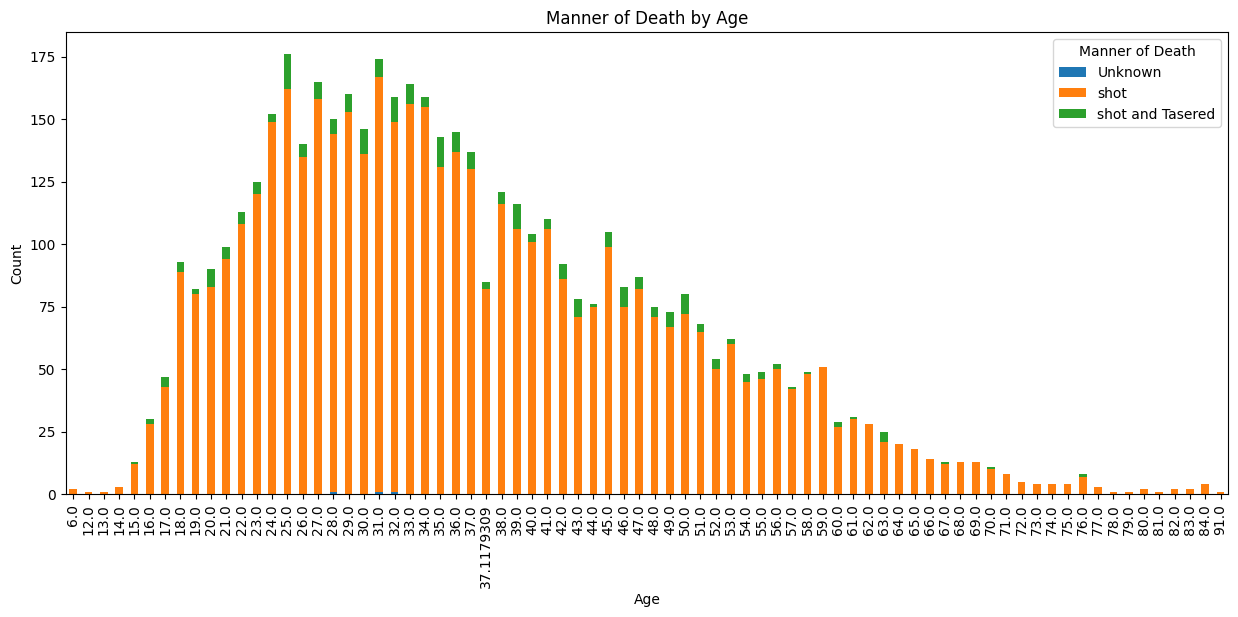

In [ ]:
#Univariate analysis
age_death_counts = df_cleaned.groupby(["age", "manner_of_death"]).size().unstack()

# Plot the bar chart
age_death_counts.plot(kind="bar", stacked=True, figsize=(15, 6))

# Labels and title
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Manner of Death by Age")
plt.legend(title="Manner of Death")
plt.show()

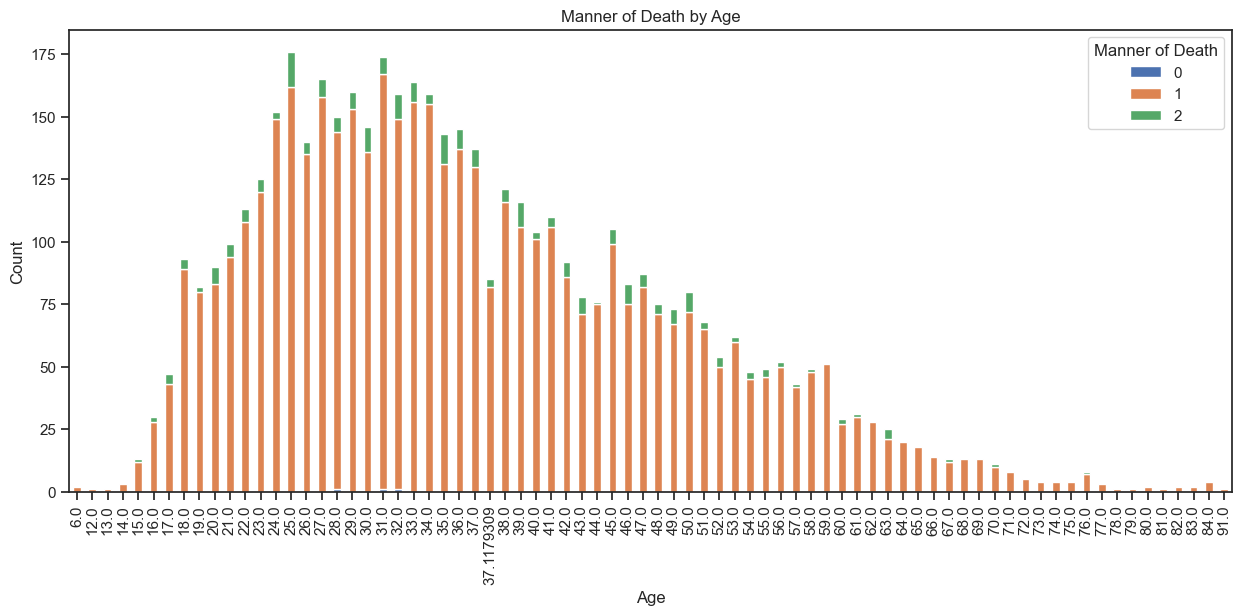

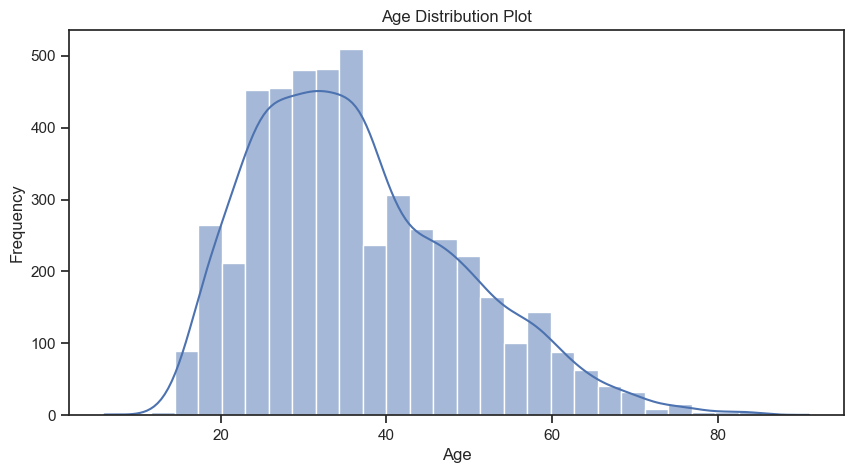

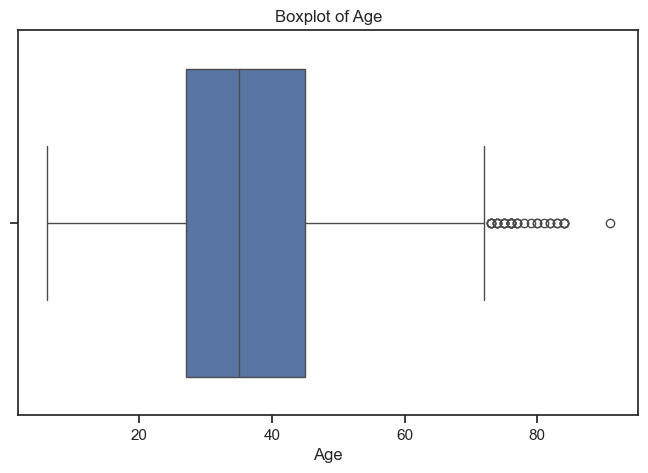

In [ ]:
#Univariate analysis

# Count occurrences of each manner_of_death per age
age_death_counts = df_cleaned.groupby(["age", "manner_of_death"]).size().unstack()

# Plot the bar chart
age_death_counts.plot(kind="bar", stacked=True, figsize=(15, 6))

# Labels and title
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Manner of Death by Age")
plt.legend(title="Manner of Death")
plt.show()

# Distribution plot
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['age'], bins=30, kde=True)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution Plot")
plt.show()

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned['age'])
plt.xlabel("Age")
plt.title("Boxplot of Age")
plt.show()


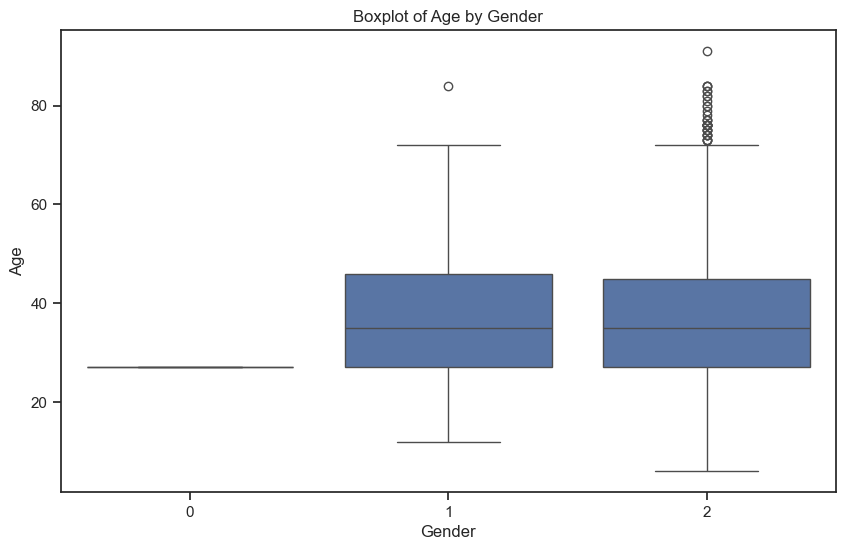

In [ ]:
#bivaraite Analysis

# Boxplot for Age vs. Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['gender'], y=df_cleaned['age'])
plt.xlabel("Gender")
plt.ylabel("Age")
plt.title("Boxplot of Age by Gender")
plt.show()


In [ ]:
#applying label encoding for categorical varaibles for multivaraite analysis
from sklearn.preprocessing import LabelEncoder



# List of categorical columns to encode
categorical_columns = [
    "manner_of_death", "armed", "gender", "race", "state", 
    "threat_level", "flee", "body_camera", "arms_category"
]

# Apply label encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col].astype(str))
    label_encoders[col] = le


# Display the first few rows
df_cleaned.head()


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-02-01,1,29,53.0,2,0,Shelton,42,True,0,2,0,5
1,4,Lewis Lee Lembke,2015-02-01,1,29,47.0,2,6,Aloha,31,False,0,2,0,5
2,5,John Paul Quintero,2015-03-01,2,80,23.0,2,2,Wichita,8,False,1,2,0,11
3,8,Matthew Hoffman,2015-04-01,1,79,32.0,2,6,San Francisco,34,True,0,2,0,8
4,9,Michael Rodriguez,2015-04-01,1,55,39.0,2,2,Evans,45,False,0,2,0,9


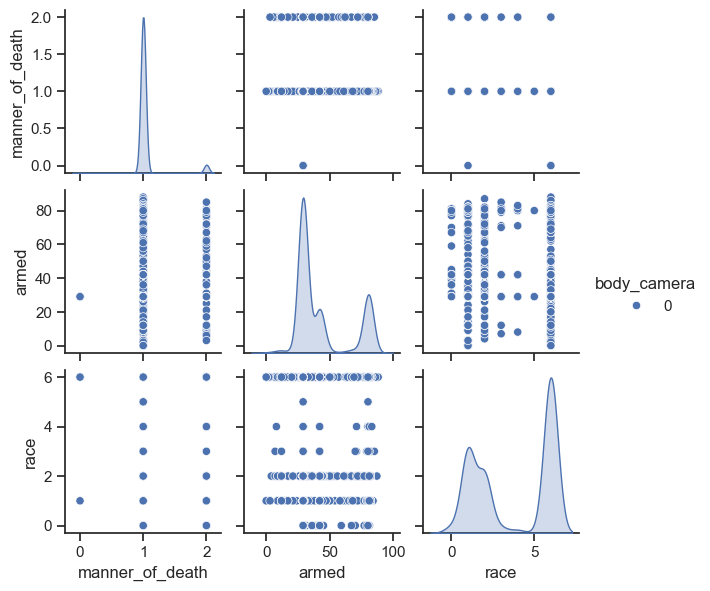

In [ ]:
#multivaraite analysis
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_cleaned,height=2,vars = ['manner_of_death', 'armed','race'], hue="body_camera")
plt.show()

In [ ]:
#correlation matrix
correlation = df_cleaned.corr(method='pearson', numeric_only=True)
correlation

,id,manner_of_death,armed,age,gender,race,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
id,1.000000,-0.056464,-0.031500,0.022361,-0.004253,-0.021724,-0.003179,-0.086920,-0.004560,-0.009189,NaN,-0.021377
manner_of_death,-0.056464,1.000000,0.051574,-0.002648,0.022963,-0.018715,0.010689,0.054895,0.050062,0.061240,NaN,0.161540
armed,-0.031500,0.051574,1.000000,-0.116847,-0.071070,-0.040991,0.026216,-0.012242,0.305917,-0.162686,NaN,0.141267
age,0.022361,-0.002648,-0.116847,1.000000,-0.006523,0.261342,-0.002582,0.096865,-0.050925,0.138712,NaN,-0.027097
gender,-0.004253,0.022963,-0.071070,-0.006523,1.000000,-0.044289,0.007390,-0.043147,-0.017324,0.009225,NaN,-0.012450
race,-0.021724,-0.018715,-0.040991,0.261342,-0.044289,1.000000,-0.028827,0.151410,-0.029907,0.036291,NaN,-0.027882
state,-0.003179,0.010689,0.026216,-0.002582,0.007390,-0.028827,1.000000,0.033315,0.052778,-0.007676,NaN,0.055487
signs_of_mental_illness,-0.086920,0.054895,-0.012242,0.096865,-0.043147,0.151410,0.033315,1.000000,0.027841,0.139445,NaN,0.120533
threat_level,-0.004560,0.050062,0.305917,-0.050925,-0.017324,-0.029907,0.052778,0.027841,1.000000,0.022207,NaN,0.114732
flee,-0.009189,0.061240,-0.162686,0.138712,0.009225,0.036291,-0.007676,0.139445,0.022207,1.000000,NaN,0.134023


<Axes: >

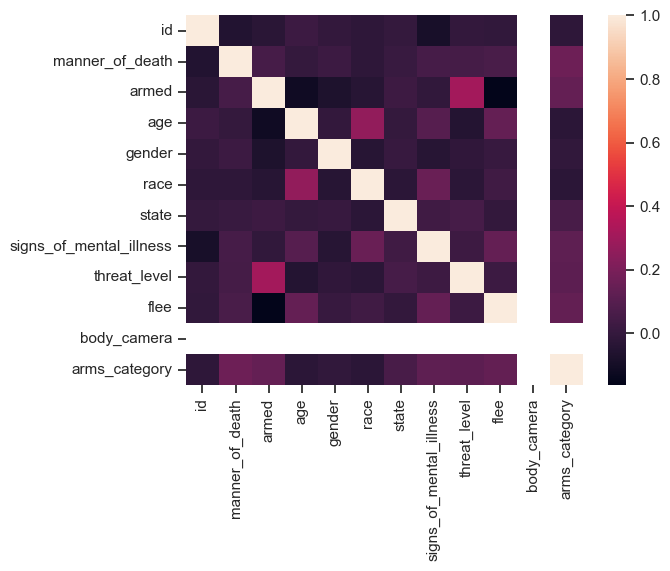

In [ ]:
#correlation matrix
sns.heatmap(correlation,xticklabels=correlation.columns,
            yticklabels=correlation.columns)

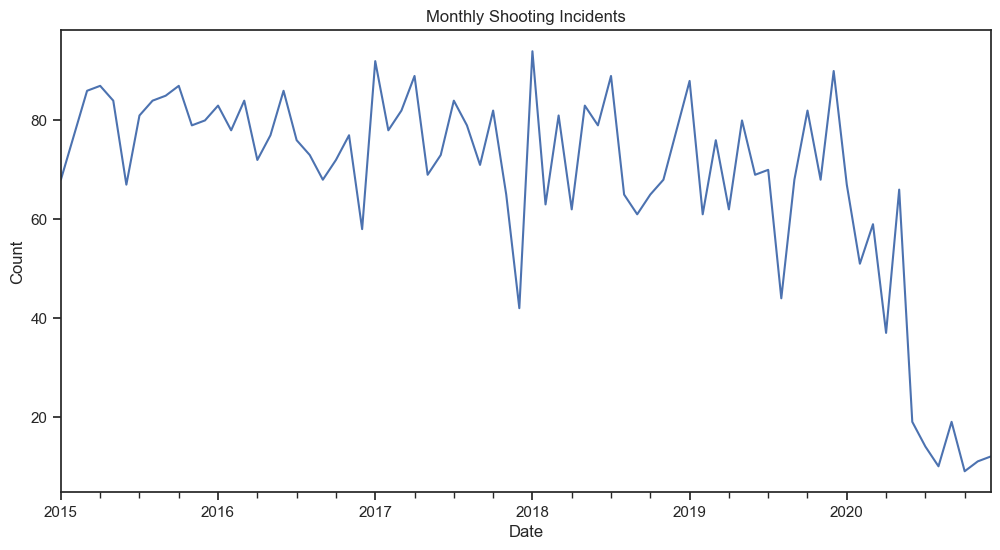

In [57]:
# Perform time series analysis
df_cleaned['year_month'] = df_cleaned['date'].dt.to_period('M')
time_series = df_cleaned.groupby('year_month').size()

# Plot time series
time_series.plot(figsize=(12, 6), title='Monthly Shooting Incidents', xlabel='Date', ylabel='Count')
plt.show()

<Axes: >

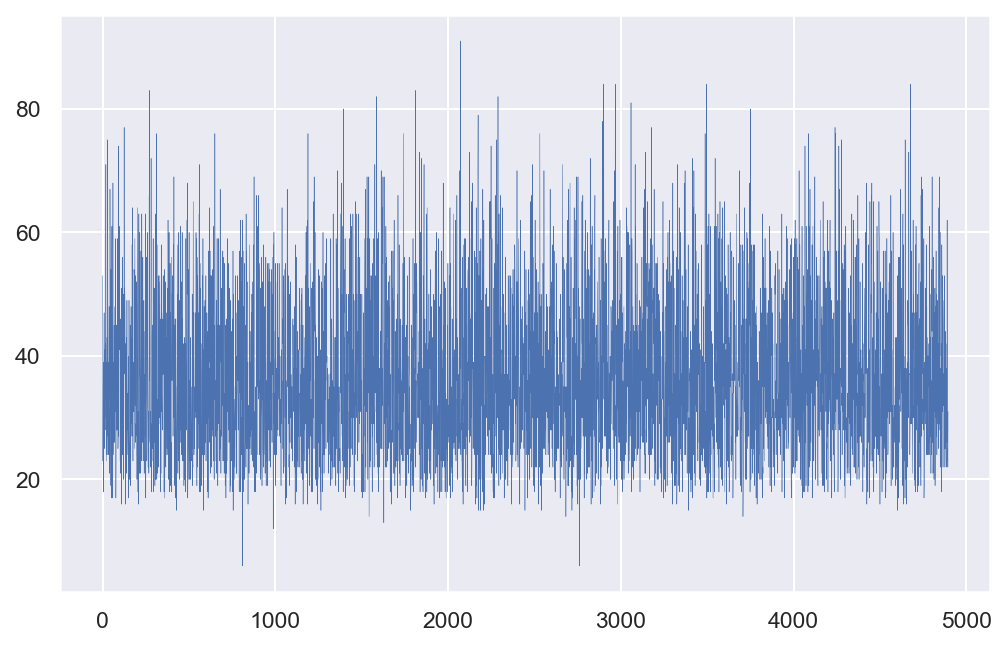

In [ ]:
# Perform time series analysis
#1. The first step is to import the seaborn and matplotlib libraries:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)}) #Runtime Configuration
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 150
     
df_cleaned['age'].plot(linewidth=0.25)


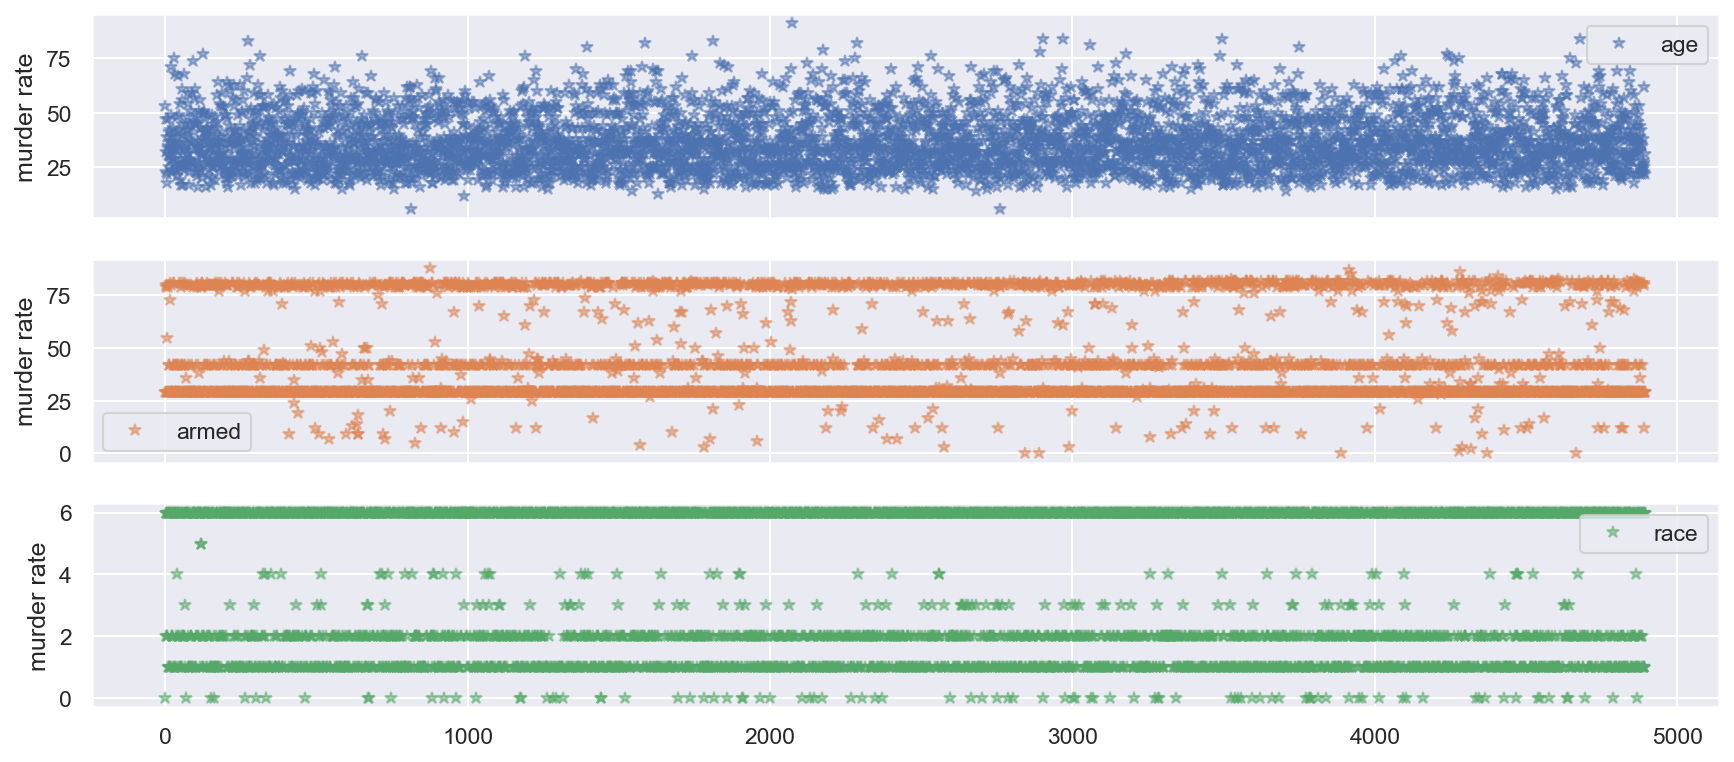

In [ ]:
# Perform time series analysis
cols_to_plot = ['age', 'armed', 'race']
axes = df_cleaned[cols_to_plot].plot(marker='*', alpha=0.5,
linestyle='None',figsize=(14, 6), subplots=True)   #True for subplots
for ax in axes:
  ax.set_ylabel('murder rate')

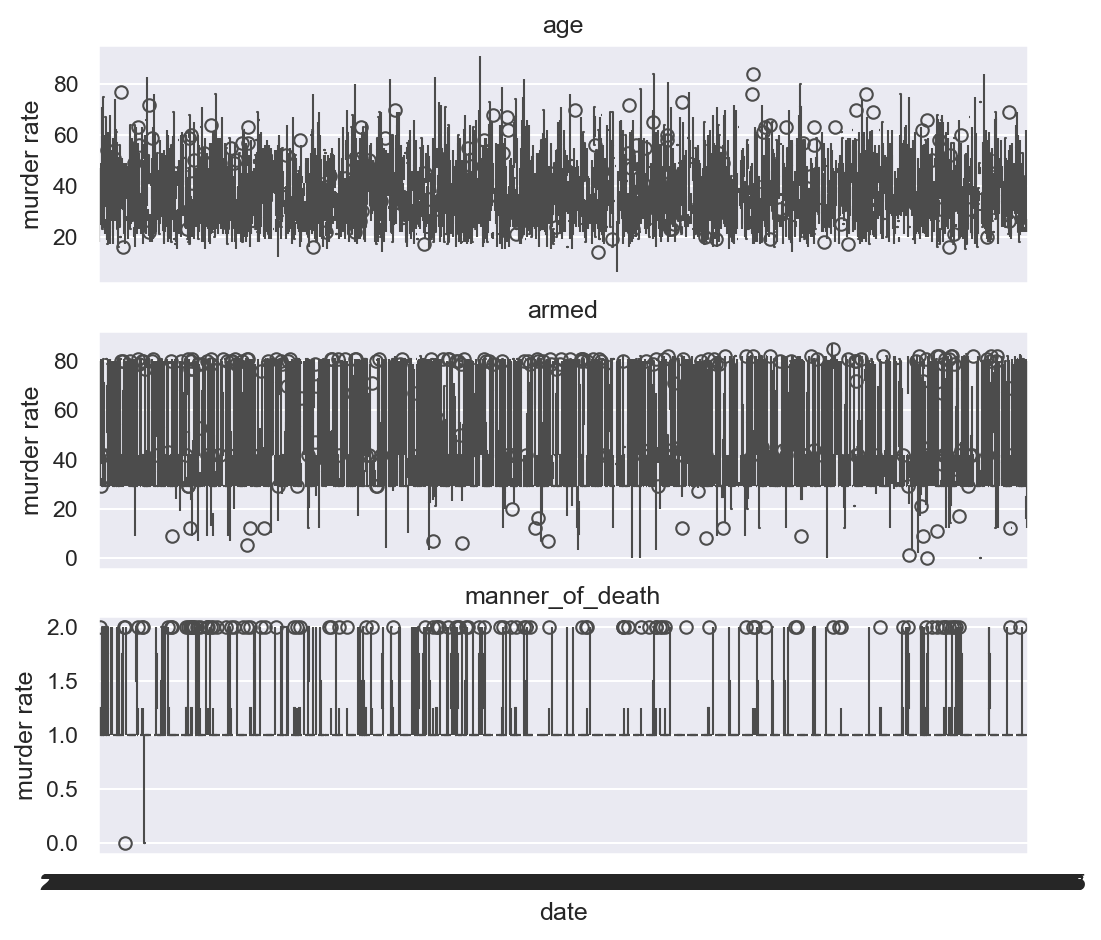

In [ ]:
#Grouping time series data
fig, axes = plt.subplots(3, 1, figsize=(8, 7), sharex=True)
for name, ax in zip(['age', 'armed', 'manner_of_death'], axes):
  sns.boxplot(data=df_cleaned, x='date', y=name, ax=ax)
  ax.set_ylabel('murder rate')
  ax.set_title(name)
  if ax != axes[-1]:
    ax.set_xlabel('')